\textbf{Copyright:} Wojciech Kowalewski WMiI UAM

\textbf{Kurs}: Modelowanie geometryczne 2021/22

---
---
#  Modelowanie geometryczne
---
---
#  I. Modelowanie parametryczne

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import math
import ipywidgets as widgets

## 3. Wymierne krzywe Beziera stopnia 3
=================================================

### 3.1. Macierz funkcji bazowych

In [7]:
bezier_basis_matrix_2D = [
        [-1.0,3.0,-3.0,1.0],
        [3.0,-6.0,3.0,0.0],
        [-3.0,3.0,.0,0.0],
        [1.0,0.0,0.0,0.0]
]
bezier_basis_matrix_2D

[[-1.0, 3.0, -3.0, 1.0],
 [3.0, -6.0, 3.0, 0.0],
 [-3.0, 3.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0]]

In [8]:
bezier_basis_function_2D = []
bezier_basis_function_2D.append(
    lambda t: bezier_basis_matrix_2D[0][0]*t**3 + bezier_basis_matrix_2D[0][1]*t**2 + bezier_basis_matrix_2D[0][2]*t + bezier_basis_matrix_2D[0][3],
)    
bezier_basis_function_2D.append(
lambda t: bezier_basis_matrix_2D[1][0]*t**3 + bezier_basis_matrix_2D[1][1]*t**2 + bezier_basis_matrix_2D[1][2]*t + bezier_basis_matrix_2D[1][3]
)
bezier_basis_function_2D.append(
    lambda t: bezier_basis_matrix_2D[2][0]*t**3 + bezier_basis_matrix_2D[2][1]*t**2 + bezier_basis_matrix_2D[2][2]*t + bezier_basis_matrix_2D[2][3]
)
bezier_basis_function_2D.append(
lambda t: bezier_basis_matrix_2D[3][0]*t**3 + bezier_basis_matrix_2D[3][1]*t**2 + bezier_basis_matrix_2D[3][2]*t + bezier_basis_matrix_2D[3][3]
)


### 3.2. Wykresy funkcji bazowych

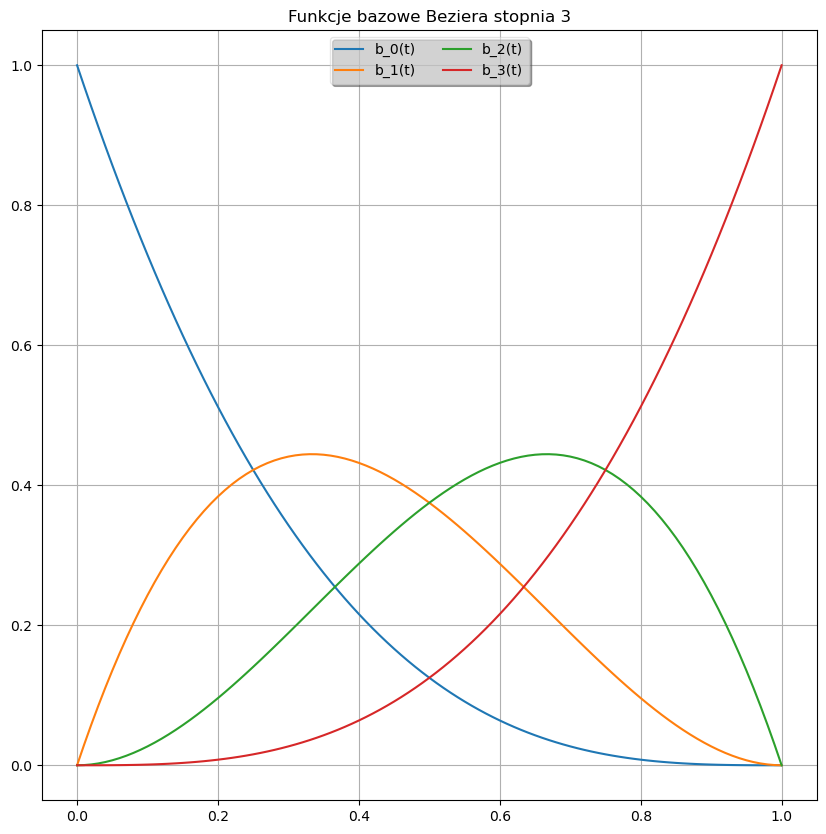

In [9]:
%matplotlib inline

t = np.arange(0.0, 1.01, 0.01)


fig, ax = plt.subplots()
#ustawienie rozmiaru obrazka na 10x10 cali
fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
plt.title("Funkcje bazowe Beziera stopnia 3")

for n in range(4):
    ax.plot(t,bezier_basis_function_2D[n](t) , label="b_"+str(n)+"(t)")

leg = ax.legend(loc='upper center', ncol=2, shadow='True')
leg.get_frame().set_alpha(0.5)
plt.grid();

plt.show()

In [10]:
def find_ext(x,y, lp, lk):
    t = np.arange(lp, lk, 0.001)
    xmin = xmax = x(lp)
    ymin = ymax = y(lp)
    for p in t:
        if x(p) < xmin:
            xmin = x(p)
        else:
            if x(p) > xmax:
                xmax = x(p)
        if y(p) < ymin:
            ymin = y(p)
        else:
            if y(p) > ymax:
                ymax = y(p)
    return [[xmin,xmax],[ymin,ymax]]

### 3.3. Przykłady

#### 3.3.1. Przykład 1

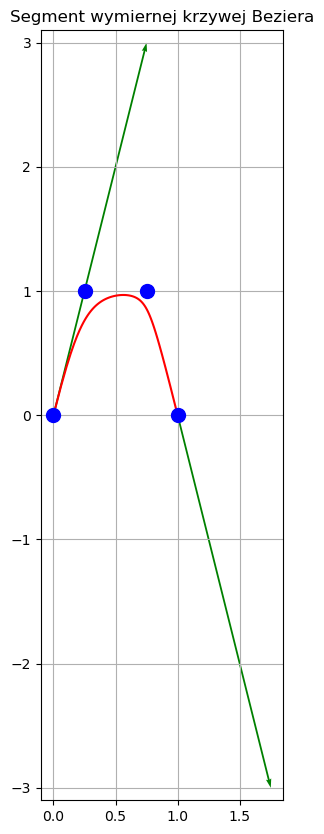

In [11]:
### %matplotlib inline

t = np.arange(0.0, 1.01, 0.01)

P0 = [0.0,0.0]
P1 = [0.25,1.0]
P2 = [0.75,1.0]
P3 = [1.0,0.0]
w = [0.5,5.0,10.0,1.0]

Tp= [3.0*(P1[0]-P0[0]),3.0*(P1[1]-P0[1])]
Tk= [3.0*(P3[0]-P2[0]),3.0*(P3[1]-P2[1])]

lenTp = math.sqrt(Tp[0]**2+Tp[1]**2)/2.54
lenTk = math.sqrt(Tk[0]**2+Tk[1]**2)/2.54 


fig, ax = plt.subplots()
#ustawienie rozmiaru obrazka na 10x10 cali
fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
plt.title("Segment wymiernej krzywej Beziera")



def X(t):
    denominator = 1.0/(w[0]*bezier_basis_function_2D[0](t) + 
                   w[1]*bezier_basis_function_2D[1](t) + 
                   w[2]*bezier_basis_function_2D[2](t) + 
                   w[3]*bezier_basis_function_2D[3](t)
                  )
    return denominator*(w[0]*P0[0]*bezier_basis_function_2D[0](t) + w[1]*P1[0]*bezier_basis_function_2D[1](t) + w[2]*P2[0]*bezier_basis_function_2D[2](t) + w[3]*P3[0]*bezier_basis_function_2D[3](t))

def Y(t):
    denominator = 1.0/(w[0]*bezier_basis_function_2D[0](t) + 
                   w[1]*bezier_basis_function_2D[1](t) + 
                   w[2]*bezier_basis_function_2D[2](t) + 
                   w[3]*bezier_basis_function_2D[3](t)
                  )
    return denominator*(w[0]*P0[1]*bezier_basis_function_2D[0](t) + w[1]*P1[1]*bezier_basis_function_2D[1](t) + w[2]*P2[1]*bezier_basis_function_2D[2](t) + w[3]*P3[1]*bezier_basis_function_2D[3](t))


extr = find_ext(X,Y,0.0,1.01)

borderXp = min(extr[0][0],P0[0]+Tp[0],P3[0]+Tk[0],P0[0],P1[0],P2[0],P3[0])-0.1
borderXk = max(extr[0][1],P0[0]+Tp[0],P3[0]+Tk[0],P0[0],P1[0],P2[0],P3[0])+0.1

borderYp = min(extr[1][0],P0[1]+Tp[1],P3[1]+Tk[1],P0[1],P1[1],P2[1],P3[1])-0.1
borderYk = max(extr[1][1],P0[1]+Tp[1],P3[1]+Tk[1],P0[1],P1[1],P2[1],P3[1])+0.1


plt.xlim(borderXp, borderXk)
plt.ylim(borderYp, borderYk)

x = X(t)
y = Y(t)

ax.set_aspect('equal')

ax.plot(x,y, color='red')

ax.plot(P0[0], P0[1],  color='blue', marker=".", markersize=20)
ax.plot(P1[0], P1[1],  color='blue', marker=".", markersize=20)
ax.plot(P2[0], P2[1],  color='blue', marker=".", markersize=20)
ax.plot(P3[0], P3[1],  color='blue', marker=".", markersize=20)



plt.quiver(P0[0],P0[1], Tp[0] , Tp[1],color='green', angles='xy', scale_units='xy', scale=1)
plt.quiver(P3[0],P3[1], Tk[0] , Tk[1],color='green', angles='xy', scale_units='xy', scale=1)


#eg = ax.legend(loc='upper center', ncol=2, shadow='True')
leg.get_frame().set_alpha(0.5)
plt.grid();

plt.show()

#### 3.3.2.  Przykład 2

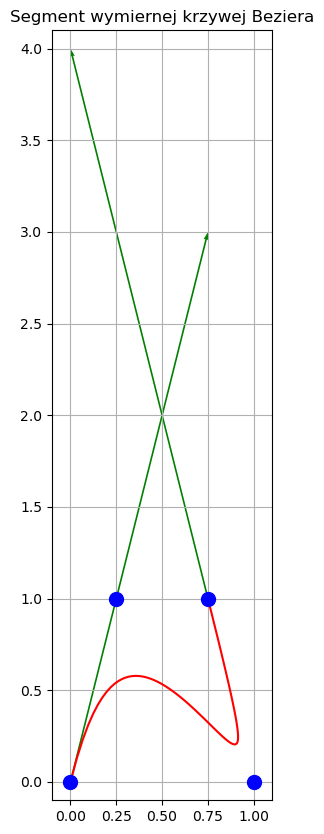

In [12]:
### %matplotlib inline

t = np.arange(0.0, 1.01, 0.01)

P0 = [0.0,0.0]
P1 = [0.25,1.0]
P2 = [1.0,0.0]
P3 = [0.75,1.0]
w = [1.0,5.0,10.0,1.0]

Tp= [3.0*(P1[0]-P0[0]),3.0*(P1[1]-P0[1])]
Tk= [3.0*(P3[0]-P2[0]),3.0*(P3[1]-P2[1])]

lenTp = math.sqrt(Tp[0]**2+Tp[1]**2)/2.54
lenTk = math.sqrt(Tk[0]**2+Tk[1]**2)/2.54 


fig, ax = plt.subplots()
#ustawienie rozmiaru obrazka na 10x10 cali
fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
plt.title("Segment wymiernej krzywej Beziera")



def X(t):
    denominator = 1.0/(w[0]*bezier_basis_function_2D[0](t) + 
                   w[1]*bezier_basis_function_2D[1](t) + 
                   w[2]*bezier_basis_function_2D[2](t) + 
                   w[3]*bezier_basis_function_2D[3](t)
                  )
    return denominator*(w[0]*P0[0]*bezier_basis_function_2D[0](t) + w[1]*P1[0]*bezier_basis_function_2D[1](t) + w[2]*P2[0]*bezier_basis_function_2D[2](t) + w[3]*P3[0]*bezier_basis_function_2D[3](t))

def Y(t):
    denominator = 1.0/(w[0]*bezier_basis_function_2D[0](t) + 
                   w[1]*bezier_basis_function_2D[1](t) + 
                   w[2]*bezier_basis_function_2D[2](t) + 
                   w[3]*bezier_basis_function_2D[3](t)
                  )
    return denominator*(w[0]*P0[1]*bezier_basis_function_2D[0](t) + w[1]*P1[1]*bezier_basis_function_2D[1](t) + w[2]*P2[1]*bezier_basis_function_2D[2](t) + w[3]*P3[1]*bezier_basis_function_2D[3](t))


extr = find_ext(X,Y,0.0,1.01)

borderXp = min(extr[0][0],P0[0]+Tp[0],P3[0]+Tk[0],P0[0],P1[0],P2[0],P3[0])-0.1
borderXk = max(extr[0][1],P0[0]+Tp[0],P3[0]+Tk[0],P0[0],P1[0],P2[0],P3[0])+0.1

borderYp = min(extr[1][0],P0[1]+Tp[1],P3[1]+Tk[1],P0[1],P1[1],P2[1],P3[1])-0.1
borderYk = max(extr[1][1],P0[1]+Tp[1],P3[1]+Tk[1],P0[1],P1[1],P2[1],P3[1])+0.1


plt.xlim(borderXp, borderXk)
plt.ylim(borderYp, borderYk)

x = X(t)
y = Y(t)

ax.set_aspect('equal')

ax.plot(x,y, color='red')

ax.plot(P0[0], P0[1],  color='blue', marker=".", markersize=20)
ax.plot(P1[0], P1[1],  color='blue', marker=".", markersize=20)
ax.plot(P2[0], P2[1],  color='blue', marker=".", markersize=20)
ax.plot(P3[0], P3[1],  color='blue', marker=".", markersize=20)



plt.quiver(P0[0],P0[1], Tp[0] , Tp[1],color='green', angles='xy', scale_units='xy', scale=1)
plt.quiver(P3[0],P3[1], Tk[0] , Tk[1],color='green', angles='xy', scale_units='xy', scale=1)


#eg = ax.legend(loc='upper center', ncol=2, shadow='True')
leg.get_frame().set_alpha(0.5)
plt.grid();

plt.show()

#### 3.3.3. Wersja interaktywna

In [13]:
%matplotlib inline


def draw_rational_Bezier_segment(P0X,P0Y,P1X,P1Y,P2X,P2Y,P3X,P3Y,w0,w1,w2,w3):
    t = np.arange(0.0, 1.01, 0.01)
    
    ### %matplotlib inline

    t = np.arange(0.0, 1.01, 0.01)

    Tp= [3.0*(P1X-P0X),3.0*(P1Y-P0Y)]
    Tk= [3.0*(P3X-P2X),3.0*(P3Y-P2Y)]

    lenTp = math.sqrt(Tp[0]**2+Tp[1]**2)/2.54
    lenTk = math.sqrt(Tk[0]**2+Tk[1]**2)/2.54 


    fig, ax = plt.subplots()
    #ustawienie rozmiaru obrazka na 10x10 cali
    fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
    plt.title("Segment wymiernej krzywej Beziera")


    def X(t):
        denominator = 1.0/(w0*bezier_basis_function_2D[0](t) + w1*bezier_basis_function_2D[1](t) + w2*bezier_basis_function_2D[2](t) + w3*bezier_basis_function_2D[3](t))
        return denominator*(w0*P0X*bezier_basis_function_2D[0](t) + w1*P1X*bezier_basis_function_2D[1](t) + w2*P2X*bezier_basis_function_2D[2](t) + w3*P3X*bezier_basis_function_2D[3](t))

    def Y(t):
        denominator = 1.0/(w0*bezier_basis_function_2D[0](t) + w1*bezier_basis_function_2D[1](t) + w2*bezier_basis_function_2D[2](t) + w3*bezier_basis_function_2D[3](t))
        return denominator*(w0*P0Y*bezier_basis_function_2D[0](t) + w1*P1Y*bezier_basis_function_2D[1](t) + w2*P2Y*bezier_basis_function_2D[2](t) + w3*P3Y*bezier_basis_function_2D[3](t))



    extr = find_ext(X,Y,0.0,1.01)

    borderXp = min(extr[0][0],P0X+Tp[0],P3X+Tk[0],P0X,P1X,P2X,P3X)-0.2
    borderXk = max(extr[0][1],P0X+Tp[0],P3X+Tk[0],P0X,P1X,P2X,P3X)+0.2

    borderYp = min(extr[1][0],P0Y+Tp[1],P3Y+Tk[1],P0Y,P1Y,P2Y,P3Y)-0.2
    borderYk = max(extr[1][1],P0Y+Tp[1],P3Y+Tk[1],P0Y,P1Y,P2Y,P3Y)+0.2

    plt.xlim(borderXp, borderXk)
    plt.ylim(borderYp, borderYk)

    x = X(t)
    y = Y(t)

    ax.set_aspect('equal')

    ax.plot(x,y, color='red')

    ax.plot(P0X, P0Y,  color='blue', marker=".", markersize=20)
    ax.plot(P1X, P1Y,  color='blue', marker=".", markersize=20)
    ax.plot(P2X, P2Y,  color='blue', marker=".", markersize=20)
    ax.plot(P3X, P3Y,  color='blue', marker=".", markersize=20)



    plt.quiver(P0X,P0Y, Tp[0] , Tp[1],color='green', angles='xy', scale_units='xy', scale=1)
    plt.quiver(P3X,P3Y, Tk[0] , Tk[1],color='green', angles='xy', scale_units='xy', scale=1)


    #eg = ax.legend(loc='upper center', ncol=2, shadow='True')
    leg.get_frame().set_alpha(0.5)
    plt.grid();

    plt.show()

p0 = [0.0,0.0]
p1 = [0.25,1]
p2 = [0.75,1]
p3 = [1.0,0.0]
w = [1.0,2.0,0.5,1.0]
    
#draw_Hermite_segment(Pp1[0],Pp1[1],Pk1[0],Pk1[1],Tp1[0],Tp1[1],Tk1[0],Tk1[1])
grid = widgets.GridspecLayout(4, 3)
grid[0, 0] = widgets.FloatSlider(min=-5, max=5, step=0.1,value=p0[0],description='P0X')
grid[0, 1] = widgets.FloatSlider(min=-5, max=5, step=0.1,value=p0[1],description='P0Y')
grid[0, 2] = widgets.FloatSlider(min=-5, max=20, step=0.05,value=w[0],description='w0')

grid[1, 0] = widgets.FloatSlider(min=-5, max=5, step=0.1,value=p1[0],description='P1X')
grid[1, 1] = widgets.FloatSlider(min=-5, max=5, step=0.1,value=p1[1],description='P1Y')
grid[1, 2] = widgets.FloatSlider(min=-5, max=20, step=0.05,value=w[1],description='w1')

grid[2, 0] = widgets.FloatSlider(min=-5, max=5, step=0.1,value=p2[0],description='P2X')
grid[2, 1] = widgets.FloatSlider(min=-5, max=5, step=0.1,value=p2[1],description='P2Y')
grid[2, 2] = widgets.FloatSlider(min=-5, max=20, step=0.05,value=w[2],description='w2')

grid[3, 0] = widgets.FloatSlider(min=-5, max=5, step=0.1,value=p3[0],description='P3X')
grid[3, 1] = widgets.FloatSlider(min=-5, max=5, step=0.1,value=p3[1],description='P3Y')
grid[3, 2] = widgets.FloatSlider(min=-5, max=20, step=0.05,value=w[3],description='w3')

k1 = widgets.VBox([grid[0,0],grid[1,0],grid[2,0],grid[3,0]])
k2 = widgets.VBox([grid[0,1],grid[1,1],grid[2,1],grid[3,1]])
k3 = widgets.VBox([grid[0,2],grid[1,2],grid[2,2],grid[3,2]])
ui = widgets.HBox([k1,k2,k3])

out = widgets.interactive_output(draw_rational_Bezier_segment, {'P0X': grid[0,0], 'P0Y': grid[0,1], 'w0': grid[0,2],
                                                        'P1X': grid[1,0], 'P1Y': grid[1,1],'w1': grid[1,2],
                                                        'P2X': grid[2,0], 'P2Y': grid[2,1], 'w2': grid[2,2],
                                                        'P3X': grid[3,0], 'P3Y': grid[3,1], 'w3': grid[3,2]
                                                       })

display(ui, out)



Output()

## 4. Krzywe B-spline
========================

### 4.1. Funkcje bazowe

In [14]:
def N(t_,i_,p_,u_):
    """
    t - wartość obliczeniowa parametru
    i - indeks  segmentu parametru
    u - wektor węzłów
    """
    
    if p_ == 0:
        if u_[i_+1] > u_[i_] or i_ == 0:  
            if u_[i_] <= t_  and t_ < u_[i_+1]: 
                return 1.0
            else:
                return 0.0
        if abs(u_[i_+1]- u_[i_])<eps:  
            if  abs(t_ - u_[i_+1])<eps: 
                return 1.0
            else:
                return 0.0   
    else:
        
        if u_[i_+p_] == u_[i_]:
          c1 = 0.0
        else:
          c11 = (t_ - u_[i_])/(u_[i_+p_] - u_[i_])
          c12 =N(t_, i_,p_-1, u_)
          c1 =  c11 * c12 
        
        if u_[i_+p_+1] == u_[i_+1]:
          c2 = 0.0
        else:
          c21 = (u_[i_+p_+1] - t_)/(u_[i_+p_+1] - u_[i_+1])
          c22 = N(t_,i_+1, p_-1, u_)
          c2 =  c21 * c22  
        return c1 + c2

### 4.2. Wykresy funkcji bazowych

In [15]:
%matplotlib inline

from IPython.display import clear_output
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from ipywidgets import Button, Layout

out = widgets.Output()
    
def draw_Bspline_basis(out):
    
    %matplotlib inline

    if knots_input.value == "":
        return
    
    
    
    knots_txt = knots_input.value.split(',')
    p = fun_level.value
    i = fun_idx.value
    m = len(knots_txt) - 1
    
    
    if (m < 1):
        print("Wektor węzłów musi być listą dlugości co najmniej 2")
        return
    if (p>=(m+1)):
        print("Stopień funkcji musi być mniejszy od  ilości węzłów ")
        return
    if (i>=m):
        print("Indeks funkcji musi być mniejszy od  ilości przedziałów wektora węzłów ")
        return
    
    knots = []
    for e in knots_txt:
        knots.append(float(e))
    
    t = np.arange(knots[0], knots[len(knots)-1], 0.001)
    with out:
        fig, ax = plt.subplots()
    #ustawienie rozmiaru obrazka na 10x10 cali
    fig.set_size_inches(25.4/2.54, 25.4/2.54, forward=True)
    plt.title("Funkcje bazowe B-spline ")

    
    
    def Npi(t):
            return N(t,i,p,knots)
    
    with out:
        clear_output(True)
        
        y = list(map(Npi,t))
        ax.plot(t,y , label="N_"+str(fun_idx.value)+","+str(fun_level.value)+"(t)")

        leg = ax.legend(loc='upper center', ncol=2, shadow='True')
        leg.get_frame().set_alpha(0.5)
        plt.grid();

        plt.show()
    

knots_input = widgets.Text(
    value="",
    description='',
    disabled=False,
    layout=Layout(width='400px')
)

par_val = widgets.FloatText(
    value=0.0,
    description='',
    disabled=False,
    layout=Layout(width='150px')
)

fun_level = widgets.IntText(
    value=0,
    description='',
    disabled=False,
    layout=Layout(width='150px')
)

fun_idx = widgets.IntText(
    value=0,
    description='',
    disabled=False,
    layout=Layout(width='150px')
)


show_hull = widgets.Checkbox(
    value=False,
    description='Show convex hull',
    disabled=False,
    indent=False
)


def update_plot(b):
    if knots_input.value != "":
        draw_Bspline_basis(out)
    
draw_button = widgets.Button(description='Draw Bspline Basis',layout=Layout(width='400px'),merge=False)
draw_button.on_click(update_plot)
label1 = widgets.Label(value="Wektor węzłów (przecinek jako separator)",  layout={'width': "400px"})
label2 = widgets.Label(value="Stopień funkcji bazowej(pusty == wszystkie)",  layout={'width': "400px"})
label3 = widgets.Label(value="Indeks funkcji bazowej",  layout={'width': "400px"})

grid = widgets.GridspecLayout(4, 2)
grid[0,0] = widgets.HBox([label1,knots_input])
grid[0,1] = draw_button
#grid[1, 0] = widgets.HBox([label2,par_val])
grid[1, 0] = widgets.HBox([label2,fun_level])
grid[2, 0] = widgets.HBox([label3,fun_idx])

display(grid,out)
#draw_Bspline(out


GridspecLayout(children=(HBox(children=(Label(value='Wektor węzłów (przecinek jako separator)', layout=Layout(…

Output()

## Zadania 




<ol>
<li> <b>Wymierne krzywe  Beziera</b> 
   <ol> 
   <li> W skrypcie 3.3.3. dodaj możliwość wystąpienia wag ujemnych oraz zabezpiecz się na wagi powodujące dzielenie przez               zero. Przetestuj konstrukcje krzywych z niektórymi wagami równymi zero oraz (niezależnie) wagami ujemnymi

   <li> Napisać wesję skryptu z punktu 2.4. dla wymiernych krzywych Beziera (<b>nieobowiązkowe</b>)

   <li> Napisać program implementujący i wizualizujący krzywe Hermite'a oraz krzywe Beziera w 3D (w obu przypadkach 3                   stopnia) (zob. <a href="https://matplotlib.org/2.0.2/examples/mplot3d/lines3d_demo.html">matplotlib demo</a>) 
       oraz (nieobowiązkowo) ich łączenie.

   
   <li>  Napisać program implementujący i wizualizujący wymierne krzywe Beziera stopnia 3 w 3D oraz  (nieobowiązkowo) ich łączenie. Przetestować rysowanie krzywych stożkowych.

</ol>
    
<li> <b>Krzywe B-spline</b>
   
   <ol> 
   <li> W skrypcie 4.2 wykonać następujące doświadzenia
   
   <ol>

   <li> Ustalić wektor węzłów na 0,1,2,3, stopień funkcji bazowej na 2, indeks funkcji bazowej na 0.

   Zaobserwować, że nośnik funkcji  bazowej, to 0-3 oraz  że najbardziej  wpływa ona w centrum tego zakresu, tzn. pomiędzy węzłami 1,2 

   <li> Zmienić wektor węzłów na 0,1,1,3 - zwiększenie krotności węzła drugiego do 2,

   Zaobserwować, że nośnik funkcji  bazowej pozostaje bez zmian, ale istotna wartość funkcji kumuluje się w otoczeniu węzła drugiego

   <li> Zmienić  wektor węzłów na 0,1,1,1,3 - zwiększenie krotności węzła drugiego do 3

   Zaobserwować, że nośnik funkcji  bazowej, to 0-1 (na prawo od drugiego węzła wpływ funkcji jest zerowy ) oraz, że funkcja najbardziej wpływa w węźle o krotności 3.

<li> Zmienić  wektor węzłów na 0,1,3,3 - zwiększenie krotności węzła trzeciego do 2

   Zaobserwować, że nośnik funkcji  bazowej, to nadal 0-3, ale  nastąpiło przesunięcie  maksymalnego wpływu funkcji w kierunku węzła 3

 <li> Zmienić  wektor węzłów na 0,3,3,3 - zwiększenie krotności węzła drugiego do 3

   Zaobserwować, że nośnik funkcji  bazowej, to nadal 0-3, ale  nastąpiło kolejne przesunięcie  maksymalnego wpływu funkcji w kierunku węzła 3 (teraz maksimum jest w tym węźle)

<li> Zmienić  wektor węzłów na 0,1,3,3,3 

   Zaobserwować, że nośnik funkcji  bazowej, to nadal 0-3, ale ostatni węzeł nie ma wpływu na kształt funkcji. Następnie zmienić indeks funkcji na 1 i zaobserwowować, że tym razem węzeł o wartości 0 nie ma wpływu na wartość funkcji - wynika to z faktu, że dziedziną funkcji $N_{1,2}(t)$ jest przedział $[1,4)$ (natomiast funkcji $N_{0,2}(t)$ przedział $[0,3)$) 

   </ol>
   <li> Wykonać analogiczne doświadczenia dla funkcji bazowej stopnia 3 
   </ol> 
    
</ol>

